# Primer análisis del conjunto de datos

En este notebook, examinaremos los pasos necesarios antes de realizar cualquier tarea de aprendizaje automático. Esto incluye:

* cargar los datos;
* analizar las variables en el conjunto de datos, en particular, diferenciar
  entre variables numéricas y categóricas, que requieren un preprocesamiento
  diferente en la mayoría de los flujos de trabajo de aprendizaje automático;
* visualizar la distribución de las variables para obtener algunos
  indicios sobre el conjunto de datos.

## Cargando el conjunto de datos del censo de adultos

Utilizaremos datos del censo de EE.UU. de 1994.

Puedes visitar la página web de OpenML para obtener más información sobre este conjunto de datos: <http://www.openml.org/d/1590>

El conjunto de datos está disponible como un archivo CSV (Valores Separados por Comas) y utilizamos `pandas` para leerlo.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Nota</p>
<p class="last"><a class="reference external" href="https://pandas.pydata.org/">Pandas</a> es una biblioteca de Python utilizada para manipular datos estructurados en 1 y 2 dimensiones. Si nunca has utilizado pandas, te recomiendo que consultes este <a class="reference external" href="https://pandas.pydata.org/docs/user_guide/10min.html">tutorial


In [27]:
import pandas as pd

adult_census = pd.read_csv("adult.csv")

El objetivo con estos datos es predecir si una persona gana más de 50K al año a partir de datos heterogéneos como la edad, el empleo, la educación, la información familiar, etc.


## Las variables (columnas) en el conjunto de datos

Los datos están almacenados en un dataframe de `pandas`. Un dataframe es un tipo de datos estructurados compuesto por 2 dimensiones. Este tipo de datos también se conoce como datos tabulares.

Cada fila representa una "muestra". En el campo del aprendizaje automático o la estadística descriptiva, términos equivalentes comúnmente utilizados son "registro", "instancia" u "observación".

Cada columna representa un tipo de información que ha sido recopilada y se denomina "característica". En el campo del aprendizaje automático y la estadística descriptiva, términos equivalentes comúnmente utilizados son "variable", "atributo" o "covariable".


Una forma rápida de inspeccionar el dataframe es mostrar las primeras líneas con el método `head`:


In [28]:
adult_census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


La columna llamada income es nuestra variable objetivo (es decir, la variable que queremos predecir). Las dos posibles clases son <=50K (bajo ingreso) y >50K (alto ingreso). Por lo tanto, el problema de predicción resultante es un problema de clasificación binaria, ya que class tiene solo dos valores posibles. Utilizamos las columnas restantes (cualquier columna que no sea income) como variables de entrada para nuestro modelo.

In [29]:
target_column = "income"
adult_census[target_column].value_counts()

,count
income,
<=50K,24720
>50K,7841


<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Nota</p>
<p>Aquí, las clases están ligeramente desbalanceadas, lo que significa que hay más muestras de una o más clases en comparación con otras. En este caso, tenemos muchas más muestras con <tt class="docutils literal">" &lt;=50K"</tt> que con <tt class="docutils literal">" &gt;50K"</tt>. El desbalance de clases ocurre a menudo en la práctica y puede requerir técnicas especiales al construir un modelo predictivo.</p>
<p class="last">Por ejemplo, en un entorno médico, si estamos tratando de predecir si los sujetos pueden desarrollar una enfermedad rara, habría muchos más sujetos sanos que enfermos en el conjunto de datos.</p>
</div>

El conjunto de datos contiene tanto datos numéricos como categóricos. Los valores numéricos toman valores continuos, por ejemplo, `"age"`. Los valores categóricos pueden tener un número finito de valores, por ejemplo, `"native.country"`.

In [30]:
numerical_columns = [
    "age",
    "education.num",
    "capital.gain",
    "capital.loss",
    "hours.per.week",
]
categorical_columns = [
    "workclass",
    "education",
    "marital.status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native.country",
]
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

Podemos verificar el número de muestras y el número de columnas disponibles en el conjunto de datos:

In [31]:
print(
    f"The dataset contains {adult_census.shape[0]} samples and "
    f"{adult_census.shape[1]} columns"
)

The dataset contains 32561 samples and 14 columns


Podemos calcular el número de características contando el número de columnas y restando 1, ya que una de las columnas es la variable objetivo.

In [32]:
print(f"The dataset contains {adult_census.shape[1] - 1} features.")

The dataset contains 13 features.


## Inspección visual de los datos

Antes de construir un modelo predictivo, es una buena idea observar los datos:

* Tal vez la tarea que estás tratando de lograr se pueda resolver sin aprendizaje automático.
* Necesitas verificar que la información que necesitas para tu tarea esté realmente presente en el conjunto de datos.
* Inspeccionar los datos es una buena manera de encontrar peculiaridades. Estas pueden surgir durante la recolección de datos (por ejemplo, un sensor defectuoso o valores faltantes) o a partir de la forma en que los datos se procesan posteriormente (por ejemplo, valores limitados).

Veamos la distribución de las características individuales para obtener algunos conocimientos sobre los datos. Podemos comenzar trazando histogramas; ten en cuenta que esto solo funciona para características que contienen valores numéricos:

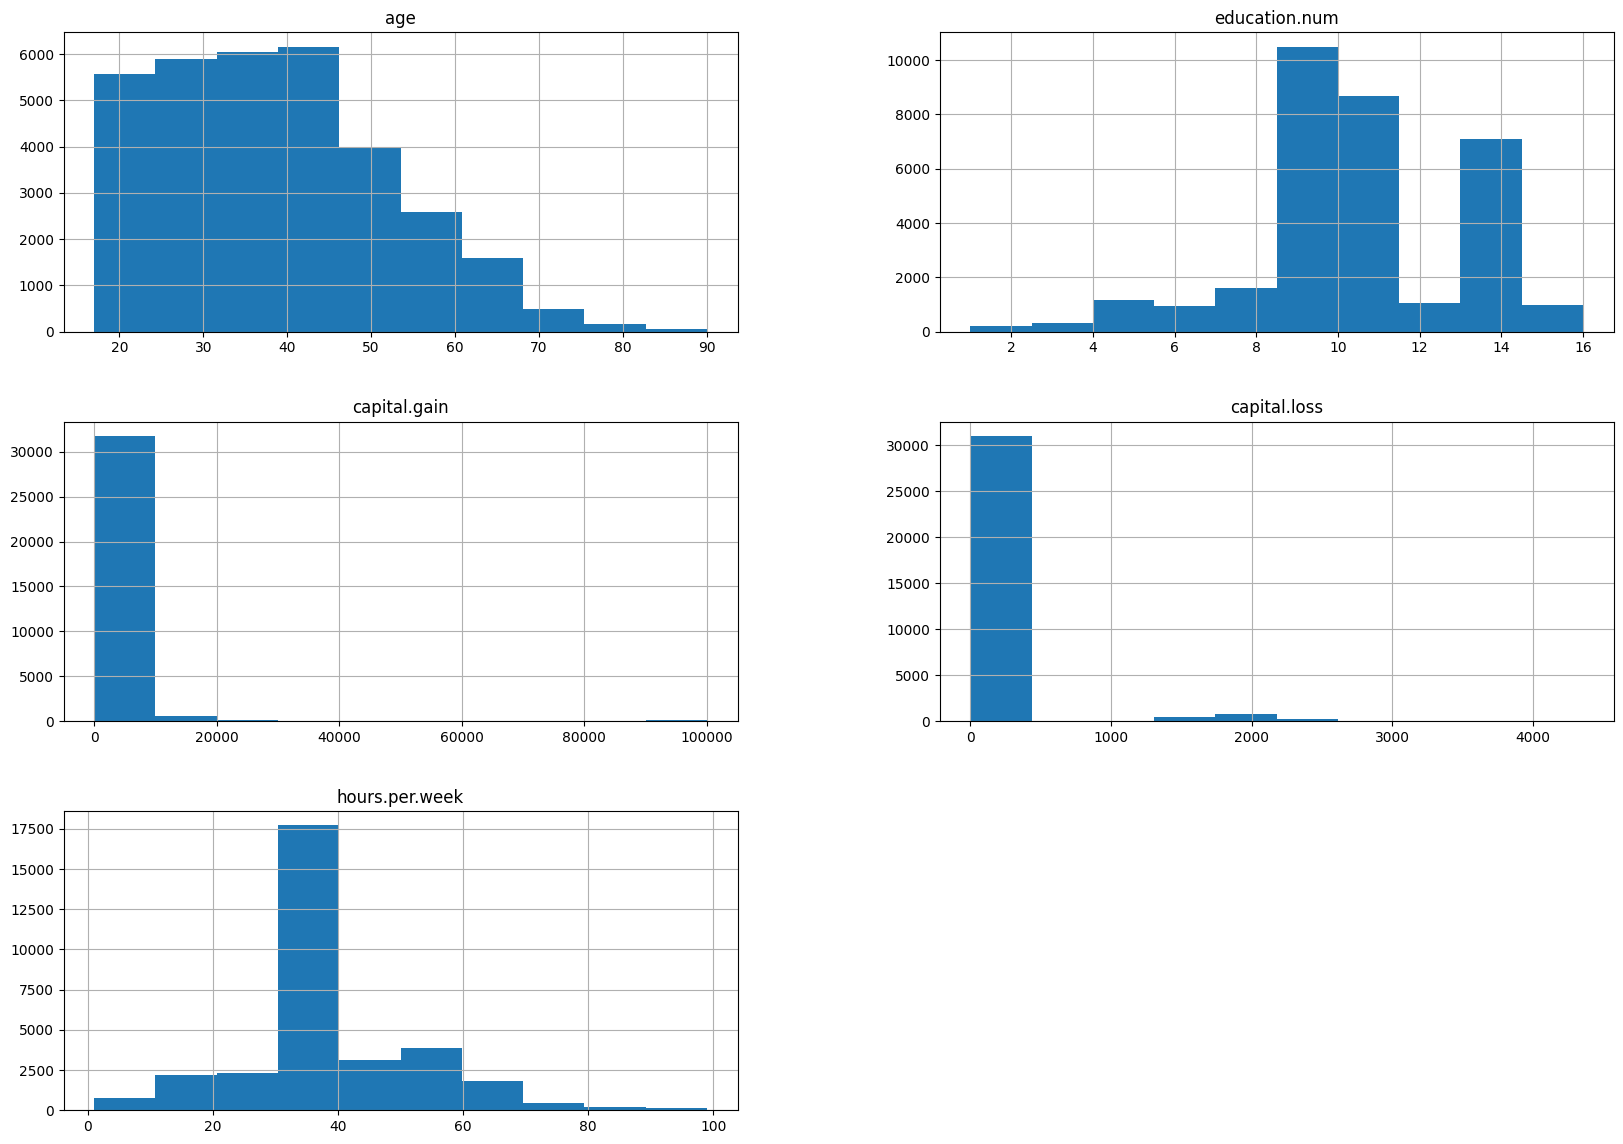

In [33]:
_ = adult_census.hist(figsize=(20, 14))

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">En la celda anterior, utilizamos el siguiente patrón: <tt class="docutils literal">_ = func()</tt>. Lo hacemos para evitar mostrar la salida de <tt class="docutils literal">func()</tt>, que en este caso no es muy útil. De hecho, asignamos la salida de <tt class="docutils literal">func()</tt> a la variable <tt class="docutils literal">_</tt> (llamada guion bajo). Por convención, en Python, la variable guion bajo se utiliza como una variable "basura" para almacenar resultados que no nos interesan.</p>
</div>



Ya podemos hacer algunos comentarios sobre algunas de las variables:

* `"age"`: no hay muchos puntos para `age > 70`. La descripción del conjunto de datos indica que se han filtrado las personas jubiladas.
* `"education.num"`: La cantidad de horas predominante está en 9, 10, 11, 13 y 14.
* `"hours.per.week"` tiene un pico en 40; esto fue muy probablemente el número estándar de horas de trabajo en el momento de la recolección de datos.
* La mayoría de los valores de `"capital.gain"` y `"capital.loss"` están cerca de cero.

Podemos comprobar estos datos si contabilizamos los valores en `"education.num"` y `"hours.per.week"` como se muestra a continuación:

In [34]:
adult_census["education.num"].value_counts()

,count
education.num,
9,10501
10,7291
13,5355
14,1723
11,1382
7,1175
12,1067
6,933
4,646


In [35]:
adult_census["hours.per.week"].value_counts()

,count
hours.per.week,
40,15217
50,2819
45,1824
60,1475
35,1297
...,...
94,1
82,1
92,1


Para las variables categóricas, podemos observar la distribución de los valores:

In [36]:
adult_census["sex"].value_counts()

,count
sex,
Male,21790
Female,10771


Ten en cuenta que el proceso de recolección de datos resultó en un importante desbalance entre el número de muestras masculinas y femeninas.

Es importante saber que entrenar un modelo con tal desbalance de datos puede causar errores de predicción desproporcionados para los grupos subre-representados.

Podemos notar que el proceso de recolección de datos de este dataset llevó a un desbalance de género inesperado, pero debemos tener en cuenta que este conjunto de datos no es representativo de la población de EE. UU. antes de sacar conclusiones basadas en sus estadísticas o en las predicciones de modelos entrenados con él.

In [37]:
adult_census["education"].value_counts()

,count
education,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


Como se mencionó anteriormente, la distribución de `"education.num"` tiene dos picos claros alrededor de 9 y 14. Sería razonable suponer que `"education.num"` representa el número de años de educación.

Veamos la relación entre `"education"` y `"education.num"`.

In [38]:
pd.crosstab(
    index=adult_census["education"], columns=adult_census["education.num"]
)

education.num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


Para cada entrada en `"education"`, hay un único valor correspondiente en `"education.num"`. Esto muestra que `"education"` y `"education.num"` proporcionan la misma información. Por ejemplo, `"education.num"=2` es equivalente a `"education"="1st-4th"`. En la práctica, esto significa que podemos eliminar `"education.num"` sin perder información. Ten en cuenta que tener columnas redundantes (o altamente correlacionadas) puede ser un problema para los algoritmos de aprendizaje automático.

Otra forma de inspeccionar los datos es hacer un `pairplot` y mostrar cómo varía cada variable según nuestra variable objetivo, es decir, `"income"`. Los gráficos a lo largo de la diagonal muestran la distribución de las variables individuales para cada `"income"`. Los gráficos fuera de la diagonal pueden revelar interacciones interesantes entre variables.

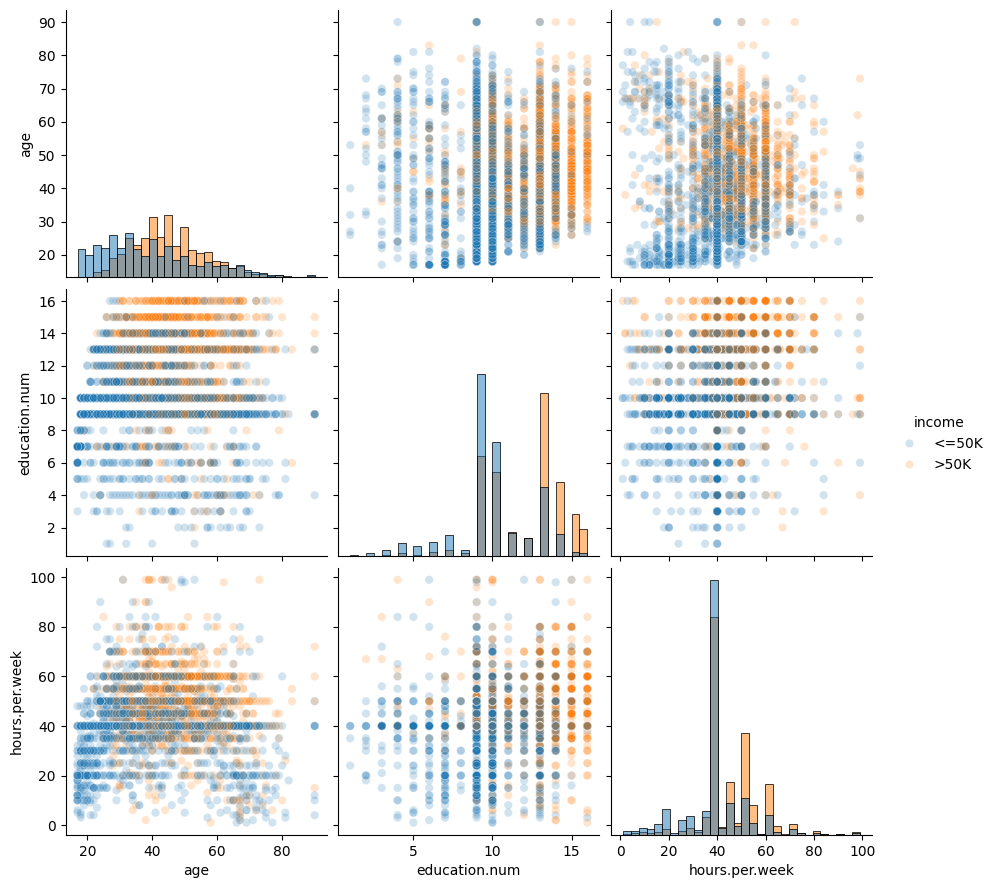

In [40]:
import seaborn as sns

# We plot a subset of the data to keep the plot readable and make the plotting
# faster
n_samples_to_plot = 5000
columns = ["age", "education.num", "hours.per.week"]
_ = sns.pairplot(data=adult_census[:n_samples_to_plot],vars=columns,hue=target_column,plot_kws={"alpha": 0.2},height=3,diag_kind="hist",diag_kws={"bins": 30})

## Creación de reglas de decisión manualmente

Al observar los gráficos anteriores, podríamos crear algunas reglas escritas a mano para predecir si alguien tiene un ingreso alto o bajo. Por ejemplo, podríamos centrarnos en la combinación de las características `"hours.per.week"` y `"age"`.

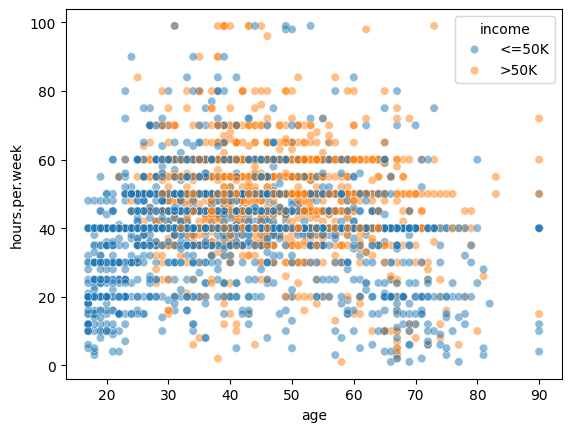

In [41]:
_ = sns.scatterplot(
    x="age",
    y="hours.per.week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

Los puntos de datos (círculos) muestran la distribución de `"hours.per.week"` y `"age"` en el conjunto de datos. Los puntos azules representan ingresos bajos y los puntos naranjas representan ingresos altos. Esta parte del gráfico es la misma que el gráfico inferior izquierdo en el pairplot anterior.

En este gráfico, podemos intentar encontrar regiones que contengan principalmente una sola clase, de modo que podamos decidir fácilmente a qué clase se debe predecir. Podríamos elaborar reglas escritas a mano como las que se muestran en este gráfico:

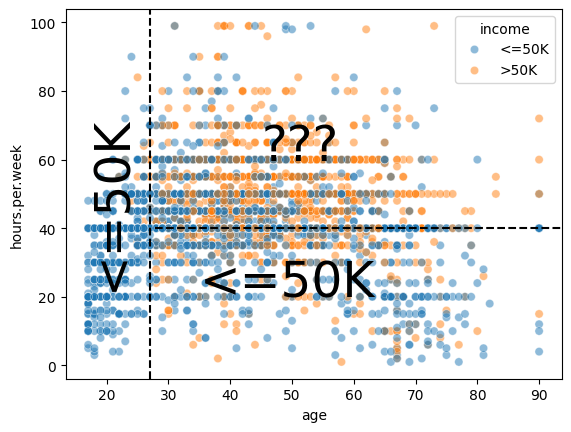

In [42]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x="age",
    y="hours.per.week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--"
)

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

* En la región `age < 27` (región izquierda), la predicción es ingreso bajo. De hecho, hay muchos puntos azules y no se ven puntos naranjas.
* En la región `age > 27 Y hours.per.week < 40` (región inferior derecha), la predicción es ingreso bajo. De hecho, hay muchos puntos azules y solo unos pocos puntos naranjas.
* En la región `age > 27 Y hours.per.week > 40` (región superior derecha), vemos una mezcla de puntos azules y naranjas. Parece complicado elegir a qué clase deberíamos predecir en esta región.

Es interesante notar que algunos modelos de aprendizaje automático funcionan de manera similar a lo que hicimos: se conocen como modelos de árboles de decisión. Los dos umbrales que elegimos (27 años y 40 horas) son algo arbitrarios, es decir, los elegimos solo mirando el pairplot. En contraste, un árbol de decisión elige los "mejores" cortes basados en los datos sin intervención o inspección humana. Los árboles de decisión los veremos más adelante.

Cabe destacar que el aprendizaje automático se utiliza a menudo cuando crear reglas a mano no es sencillo. Por ejemplo, porque estamos en una alta dimensión (muchas características en una tabla) o porque no hay reglas simples y obvias que separen las dos clases, como en la región superior derecha del gráfico anterior.

En resumen, lo importante a recordar es que en un entorno de aprendizaje automático, un modelo crea automáticamente las "reglas" a partir de los datos existentes para hacer predicciones sobre nuevos datos no vistos.

## Resumen

En este notebook hemos:

* Cargado los datos desde un archivo CSV utilizando `pandas`.
* Examinado los diferentes tipos de variables para diferenciar entre variables categóricas y numéricas.
* Inspeccionado los datos con `pandas` y `seaborn`. La inspección de datos puede permitirte decidir si el uso de aprendizaje automático es apropiado para tus datos y resaltar posibles peculiaridades en ellos.

Hicimos observaciones importantes (que se discutirán más detalladamente más adelante):

* Si tu variable objetivo está desbalanceada (por ejemplo, tienes más muestras de una categoría objetivo que de otra), puede que necesites técnicas especiales para entrenar y evaluar tu modelo de aprendizaje automático.
* Tener columnas redundantes (o altamente correlacionadas) puede ser un problema para algunos algoritmos de aprendizaje automático.
* A diferencia de los árboles de decisión, los modelos lineales solo pueden capturar interacciones lineales, así que ten en cuenta las relaciones no lineales en tus datos.